# Part 7 -- Tuning Hyperparameters (Naive Bayes)

Using GridSearchCV to find the best parameters to optimize our model.

**Load lib codes**

In [2]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [4]:
X_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_train.pickle')

In [5]:
y_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_train.pickle')

In [6]:
X_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_test.pickle')

In [7]:
y_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_test.pickle')

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB

In [9]:
nb = MultinomialNB().fit(X_train, y_train)

In [10]:
print("Training set score: \t{}".format(nb.score(X_train, y_train)))
print("Test set score: \t{}".format(nb.score(X_test, y_test)))

Training set score: 	0.6261042617221629
Test set score: 	0.5697644317887652


In [11]:
params = {
    'alpha': np.linspace(1,30,20)
}

In [13]:
nb_gs = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=5, random_state=42))

In [77]:
nb_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.     ,   2.52632,   4.05263,   5.57895,   7.10526,   8.63158,
        10.15789,  11.68421,  13.21053,  14.73684,  16.26316,  17.78947,
        19.31579,  20.84211,  22.36842,  23.89474,  25.42105,  26.94737,
        28.47368,  30.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
cv_results = pd.DataFrame(nb_gs.cv_results_)
cv_results[['mean_test_score', 'mean_train_score','params', 'rank_test_score']][(cv_results['rank_test_score']==1)].T

,3
mean_test_score,0.577674
mean_train_score,0.613541
params,{'alpha': 5.57894736842}
rank_test_score,1


In [79]:
pd.DataFrame(nb_gs.predict(X_test)).sample(5)

,0
12841,0
8410,0
13462,0
10954,0
12540,1


In [80]:
pd.DataFrame(nb_gs.predict_proba(X_test)).sample(5)

,0,1
10461,0.559088,0.440912
4042,0.485501,0.514499
7084,0.560675,0.439325
5647,0.551226,0.448774
6745,0.562138,0.437862


# HOW DO I TIE THIS BACK TO WORDS? WHAT DO THESE MEAN?

In [57]:
X_tfidf = joblib.load(../Analyzing_Unstructured_Data_for_Finance/data/)

SyntaxError: invalid syntax (<ipython-input-57-7cac870749f9>, line 1)

In [ ]:
X_test[15442]

In [ ]:
tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.tfidf_transformer.pickle')

In [ ]:
tfidf.inverse_transform(X_test[15431])

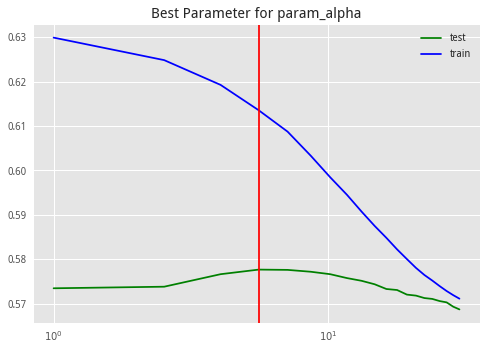

In [81]:
model_graph = pd.DataFrame(nb_gs.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(nb_gs.best_estimator_.alpha, c='r')
plt.xscale("log")
plt.title("Best Parameter for param_alpha")
plt.legend()